# Общая информация

Корреляции между датчиками смартфона, алгоритмами и соответствующими методами являются основными компонентами, облегчающими локализацию и отслеживание в помещении при отсутствии стандартов связи и локализации. Можно отметить серьезный пробел в исследованиях с точки зрения объяснения связей между этими компонентами для выяснения последствий и проблем моделей, предназначенных для локализации и отслеживания в помещении.  

Данные были отобраны с частотой 10 Гц в течение пяти секунд в фиксированных местах.  
Кроме того, данные также собирались во время движения.  

Из-за того, что наш мир не настолько идеален и реальный объект это не просто двигающийся кубик в неком пустом пространстве, создаются множество проблем для получения инерциального навигационого решения.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

url = ""

Загрузим данные

In [6]:
from google.colab import drive

url = '/content/drive/My Drive/Colab Notebooks/'
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [115]:
dataset = pd.read_csv(url + 'data/accelerometer_gyro_mobile_phone_dataset.csv')

# Информация о наборе данных

Выведим некоторую информацию па набору данных

In [9]:
dataset.head()

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity
0,-0.496517,3.785628,8.954828,-0.142849,-0.126159,-0.022539,34:22.9,1
1,-0.462388,3.869603,9.281898,0.084349,0.096695,0.092130,34:23.0,1
2,-0.296084,3.820505,8.930728,0.061763,0.051543,0.071287,34:23.1,1
3,-0.469723,3.890110,8.744067,0.007641,0.028679,0.109433,34:23.2,1
4,-0.472418,4.109105,8.941207,-0.123640,0.099057,0.051943,34:23.3,1


In [10]:
dataset.describe()

,accX,accY,accZ,gyroX,gyroY,gyroZ,Activity
count,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000
mean,0.023825,2.153858,9.537909,-0.004493,-0.014756,-0.007021,0.982151
std,0.741396,1.085466,2.056358,0.307643,0.249201,0.266120,0.132404
min,-3.673361,-4.386029,4.296066,-1.470421,-1.430659,-1.894102,0.000000
25%,-0.472193,1.413062,7.794217,-0.149783,-0.162656,-0.154126,1.000000
50%,-0.024998,2.119143,9.406739,0.022301,-0.011060,0.005261,1.000000
75%,0.477208,2.928435,11.158845,0.177978,0.124966,0.152061,1.000000
max,4.678671,6.377039,17.591568,1.332722,1.480135,1.482268,1.000000


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31991 entries, 0 to 31990
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   accX       31991 non-null  float64
 1   accY       31991 non-null  float64
 2   accZ       31991 non-null  float64
 3   gyroX      31991 non-null  float64
 4   gyroY      31991 non-null  float64
 5   gyroZ      31991 non-null  float64
 6   timestamp  31991 non-null  object 
 7   Activity   31991 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 2.0+ MB


In [80]:
dataset.describe(include=['O'])

,timestamp
count,31991
unique,21776
top,54:46.9
freq,4


Пропуски отсутствуют

In [134]:
n_features = 6

## Преобразуем timestamp

In [109]:
for i, t in zip(range(dataset.shape[0]), dataset.timestamp.values):
  d = t.split(sep=' ')
  if len(d) != 1:
    print(i, d)

20928 ['6/25/2022', '14:05']


In [118]:
def time(timestamp):
  time = []
  hour = 0
  for x in timestamp:
    t = x.split(sep=' ')
    if len(t) != 1:
      t = t[-1]
    else:
      t = t[0]
    min, sec = t.split(sep=':')
    min = float(min)
    if min == 0:
      hour += 1
    time.append(hour*60.0*60.0 + min*60.0 + float(sec))
  return time

sec = time(dataset.timestamp.values)

In [119]:
dataset.timestamp = sec
# И сместим точку отчета в ноль
dataset.timestamp -= dataset.timestamp[0]

In [133]:
describe = dataset.describe()
describe

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity
count,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,3.199100e+04,31991.000000
mean,0.023825,2.153858,9.537909,-0.004493,-0.014756,-0.007021,9.873494e+05,0.982151
std,0.741396,1.085466,2.056358,0.307643,0.249201,0.266120,6.137616e+05,0.132404
min,-3.673361,-4.386029,4.296066,-1.470421,-1.430659,-1.894102,0.000000e+00,0.000000
25%,-0.472193,1.413062,7.794217,-0.149783,-0.162656,-0.154126,6.540909e+05,1.000000
50%,-0.024998,2.119143,9.406739,0.022301,-0.011060,0.005261,6.557339e+05,1.000000
75%,0.477208,2.928435,11.158845,0.177978,0.124966,0.152061,1.279527e+06,1.000000
max,4.678671,6.377039,17.591568,1.332722,1.480135,1.482268,2.021333e+06,1.000000


## Визуализация данных

### Покажем распределение измерений

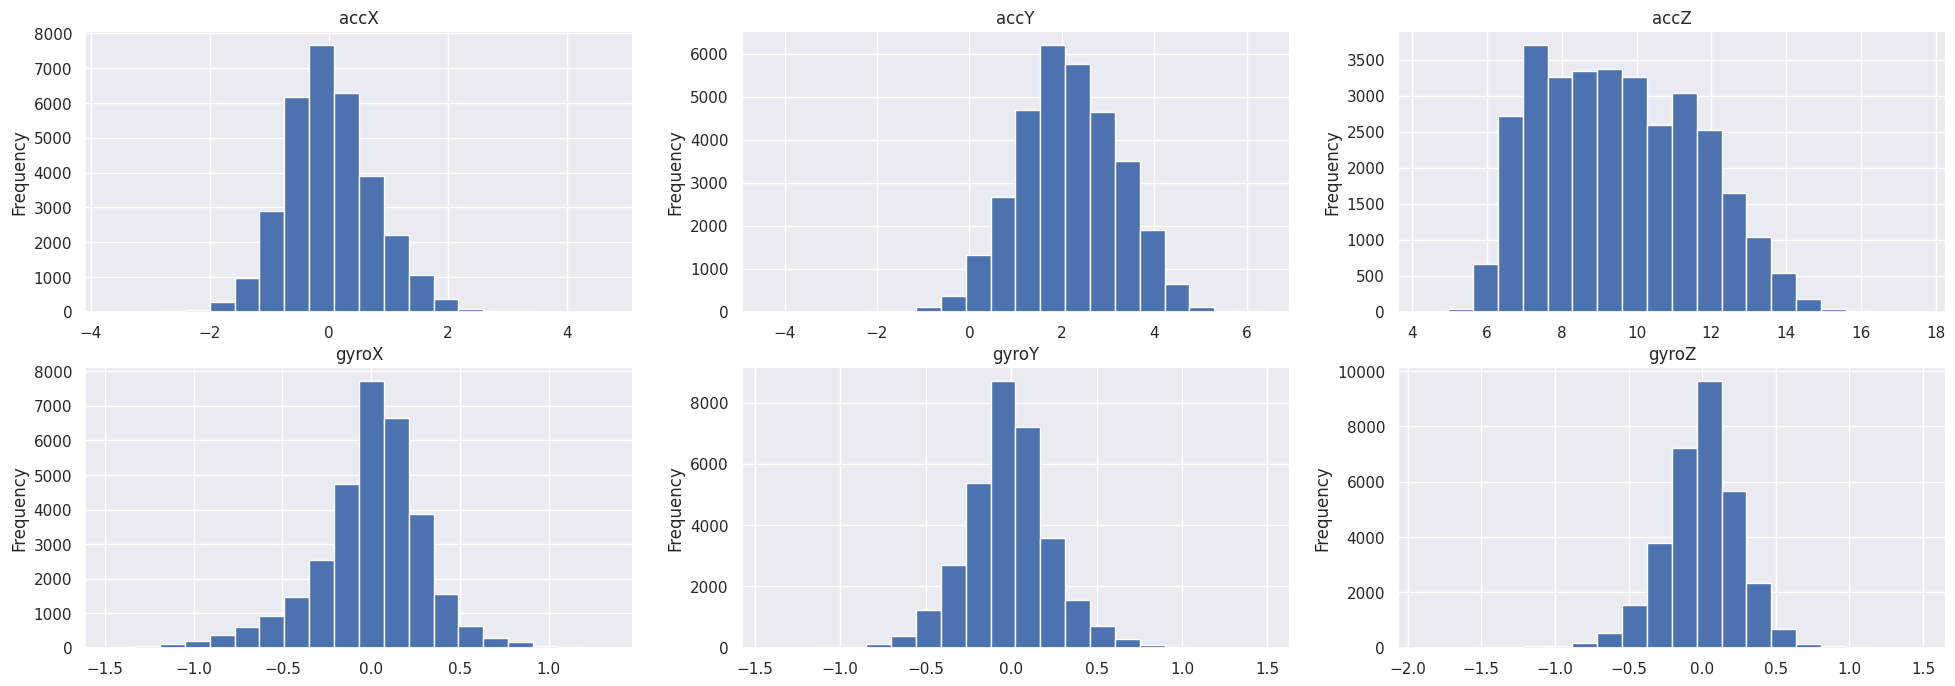

In [135]:
plt.figure(figsize=(8*3,4*2))


for i, col in zip(range(n_features), dataset.columns[:-2]):
    plt.subplot(2, 3, i+1)

    dataset[col].plot(kind='hist', bins=20, title=col)
    plt.gca().spines[['top', 'right',]].set_visible(False)

**Видем, что данные с гироскопа и акселерометра подчиняются гауссовскому распределению. Это дает понять, что в основном в приборах присутствует гауссовский шум.**

### Рассмотрим временные ряды

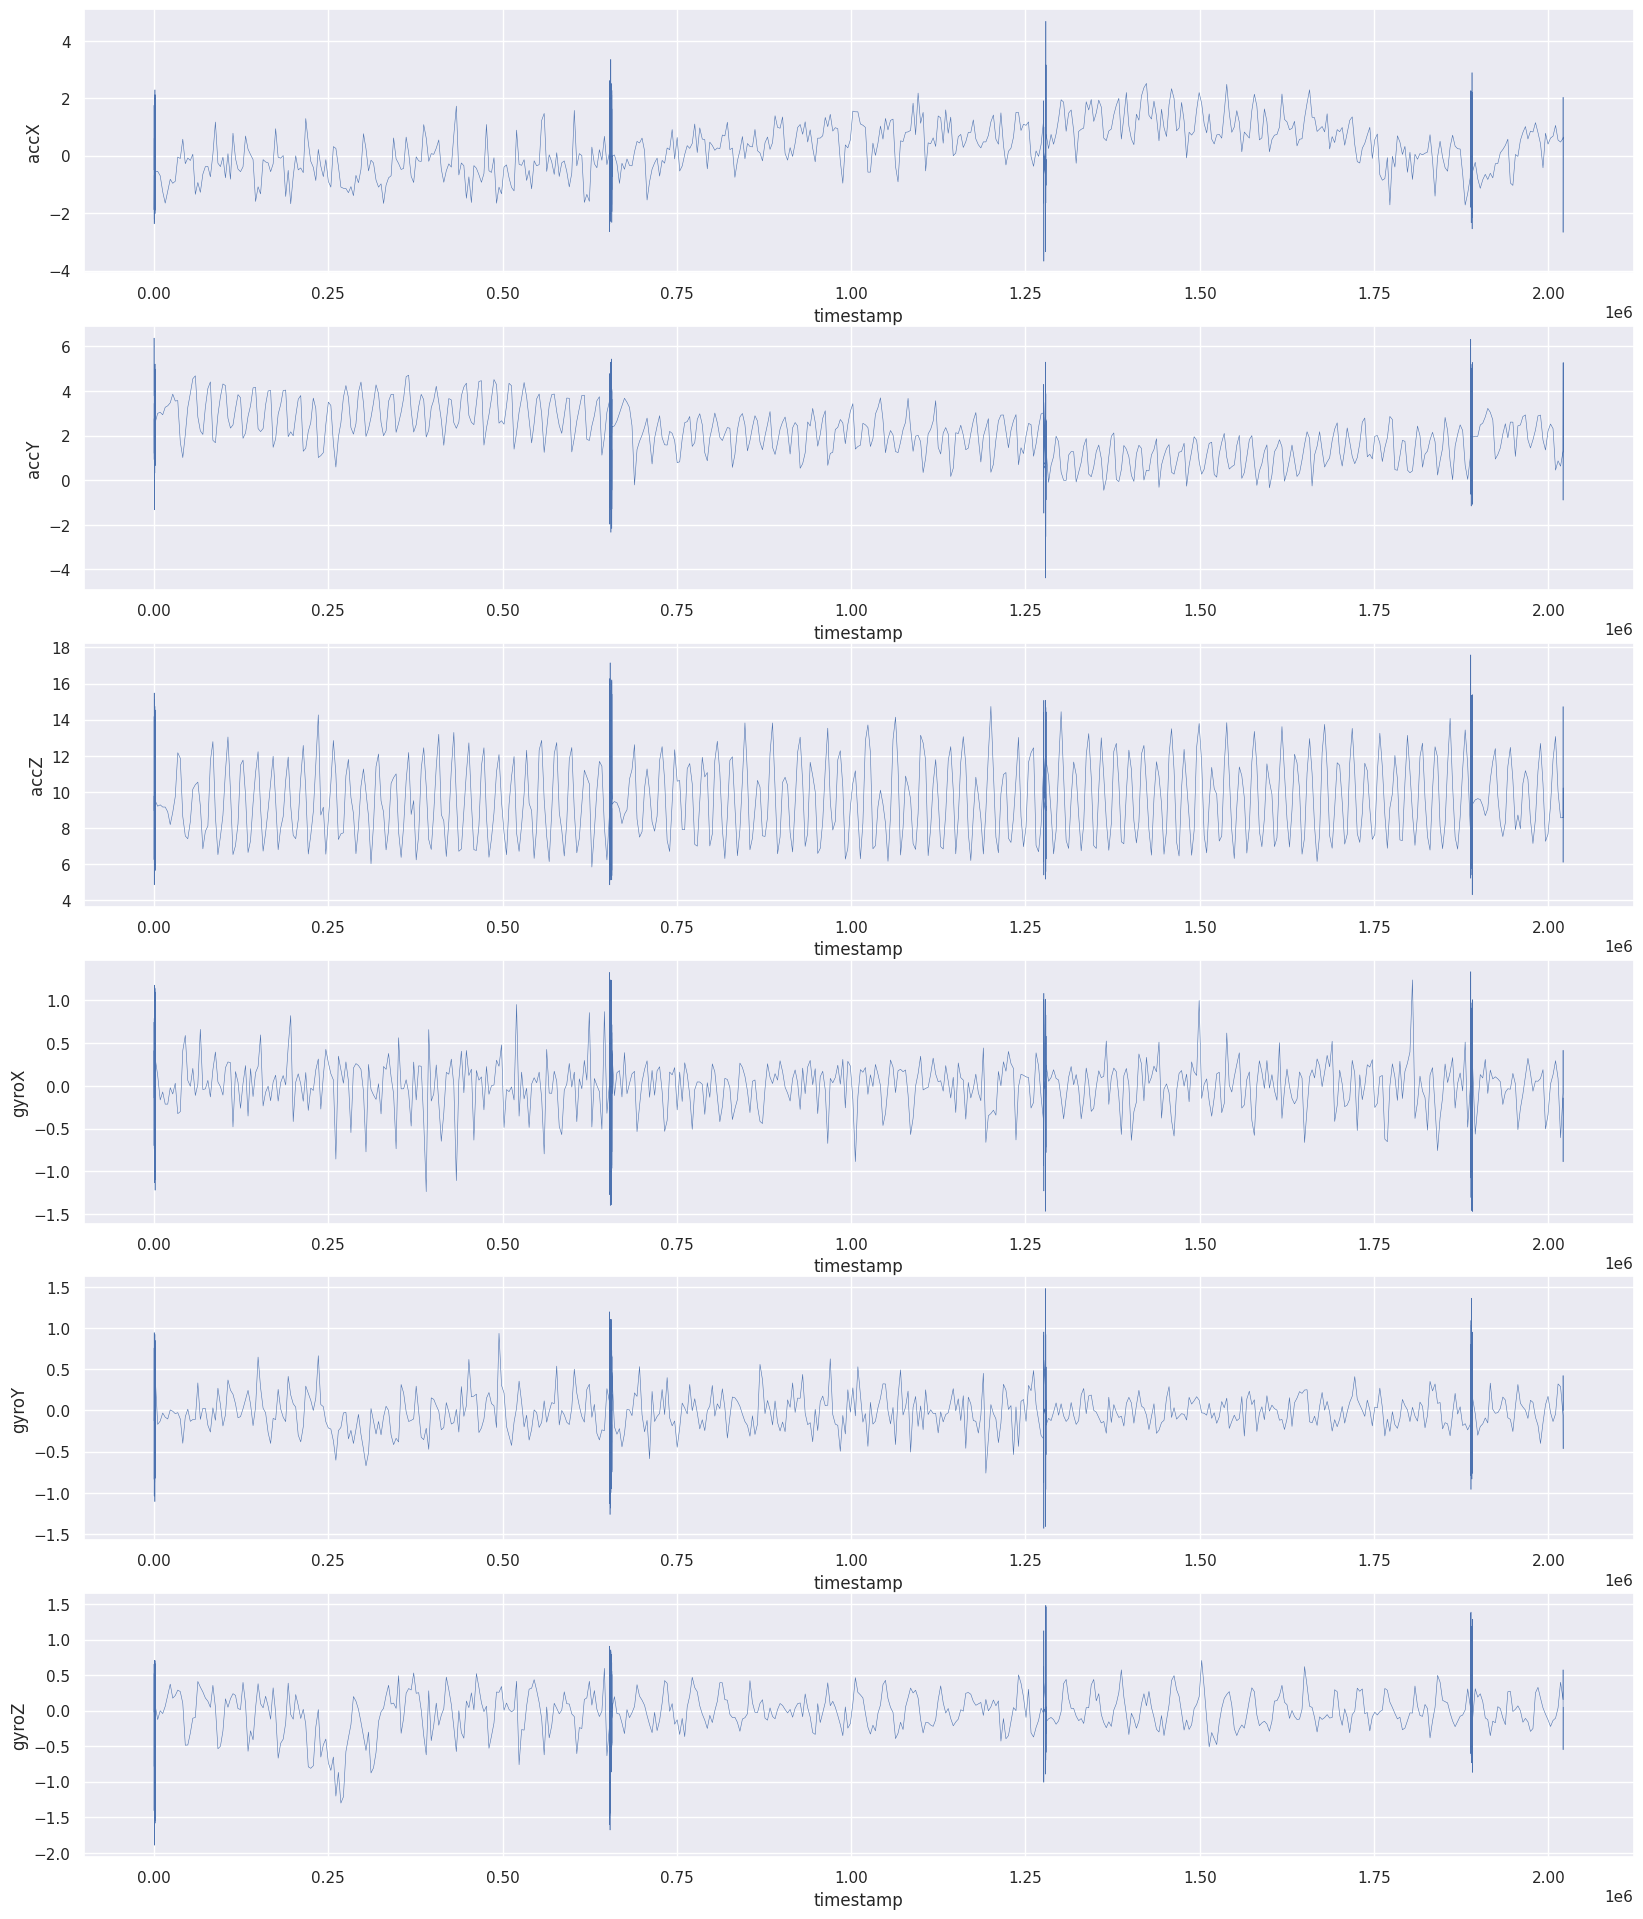

In [131]:
describe = dataset.describe()
n_features = 6

plt.figure(figsize=(20,4*n_features))


for i, col in zip(range(n_features), dataset.columns[:-2]):
  plt.subplot(n_features, 1, i+1)
  plt.plot(dataset.timestamp, dataset[col], lw=0.4)

  mean = describe[col].iloc[1]
  max = describe[col].iloc[-1]

  plt.xlabel('timestamp')
  plt.ylabel(col)
plt.show()

Text(0, 0.5, 'Activity')

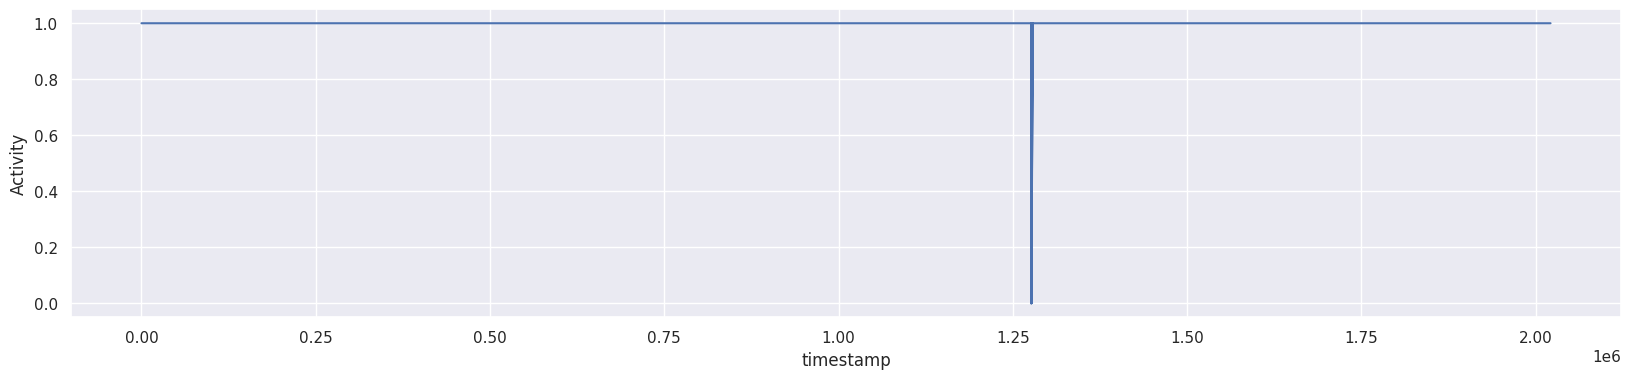

In [143]:
plt.figure(figsize=(20,4))

plt.plot(dataset.timestamp, dataset.Activity)
plt.xlabel('timestamp')
plt.ylabel('Activity')

### Вывод

**По графикам видно, что измерения можно представить, как сумму тригонометрических функций, где частоты будут меняться со временем.**

**Можно попытаться перейти в частотное пространство, используя Фурье-преобразование или Вейвлет-преобразование.**

**В реальности для таких задач мог бы подойти оконное Фурье-преобразование, как, к примеру, при получении электрокардиограммы.**

Для решение задачи как раз можно получить ряды частот с амплитудами и для каждой из оси приборов использовать свой оптимальный набор частот с пороговыми значениями амплитуд, говоря простым языком.  
Есть только в этом одна важная проблема, пороги находятся для фиксированной системы координат, так как есть сила тяжести.

Из-за этого, IMU должны приводиться к конкретной СК, обычно это Международная земная система координат, либо просчитываться во время работы, но для этого надо получать точные данные с других источников.

Выбор частот, по которым в дальнейшем будет обучаться одна из модель, зависит от профиля движения объекта, в основном это низкочастотный спектр примерно до 10 Гц. Так как выше, либо шумы, либо редкие мгновенные действия.  
Человек может быстро повернуться, но на небольшой угол, и делать это часто.  
Оставаясь зачастую неподвижно.   
А вот ускорение наоборот может оказаться большим, но не продолжительным.  
Ещё сильно зависит от расположения телефона, в руках он, в сумке или в кармане.  

Это приводит на мысль, что определение стоянки будет обладать хорошой точностью, но с низкой полнотой или низкой точностью и большой полнотой.  
Я считаю, что здесь важно как можно меньше ложных ответов, так как они могут приводить к увеличению ошибки определения локализации.

# Предобработка данных